# Análise de Dados Experimentais - Vol 1

## Fundamentos de Estatística e Estimação de Parâmetros

### Márcio Schwaab e José Carlos Pinto

### Cap 5: Estimação de Parâmetros

### Exercício 5.2

Afrânio

[github.com/afraeq](github.com/afraeq)

[afrjr.weebly.com](afrjr.weebly.com)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize

colorcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

#### Dados experimentais

In [3]:
xe = np.array([1, 2, 3, 5, 10, 15, 20, 30, 40, 50])
ye = np.array([1.66, 6.07, 7.55, 9.72, 15.24, 18.79, 19.33, 22.38, 24.27, 25.51])

NE = 10

sigma2 = np.ones(NE)

dados = np.array([xe, ye, sigma2]).T
dados

array([[ 1.  ,  1.66,  1.  ],
       [ 2.  ,  6.07,  1.  ],
       [ 3.  ,  7.55,  1.  ],
       [ 5.  ,  9.72,  1.  ],
       [10.  , 15.24,  1.  ],
       [15.  , 18.79,  1.  ],
       [20.  , 19.33,  1.  ],
       [30.  , 22.38,  1.  ],
       [40.  , 24.27,  1.  ],
       [50.  , 25.51,  1.  ]])

#### Modelos

$$ y_1 = \frac{\alpha_1}{1+\alpha_2 x}$$

$$ y_2 = {\alpha_1}x^{\alpha_2}$$

In [26]:
y1= lambda x, alpha: alpha[0]*x/(1+alpha[1]*x)
y2= lambda x, alpha: alpha[0]*x**(alpha[1])

#### Função objetivo

$$F_{obj} = \sum_{i=1}^{NE} \frac{(y_i^e-y_i^m)^2}{\sigma_i^2}$$

In [5]:
F_obj1 = lambda alpha: np.sum((ye-y1(xe, alpha))**2/sigma2)
F_obj2 = lambda alpha: np.sum((ye-y2(xe, alpha))**2/sigma2)

#### Minimizando funções objetivo

In [31]:
x0_1 = [1, 1]
x0_2 = [1, 1]

result1 = scipy.optimize.minimize(F_obj1, x0_1)
result2 = scipy.optimize.minimize(F_obj2, x0_2)

alpha_opt1 = result1.x
fopt1 = result1.fun

alpha_opt2 = result2.x
fopt2 = result2.fun

print(alpha_opt1, '\n', fopt1,'\n')
print(alpha_opt2, '\n', fopt2,'\n')

[3.07849144 0.10246442] 
 3.9759743840912884 

[5.04195321 0.43170202] 
 26.179045085992534 



#### Matriz de covariâncias dos parâmetros

$$\mathbf{V_{\alpha}} = [\mathbf{B^TV_y^{-1}B]^{-1}},$$

sendo:

* $\mathbf{B} = \displaystyle\left[\frac{\partial \mathbf{y_m}}{\partial \boldsymbol\alpha}\right]$, de dimensão NE $\times$ NP, a matriz de sensitividades;
* $\mathbf{V_y}$ a matriz de covariâncias das medidas experimentais, que resulta diagonal sob a hipótese de erros independentes.

In [34]:
# número de parâmetros
NP = 2

# desvio para cálculo das derivadas numéricas em B
dp = 1e-9

# matriz de covariâncias dos erros experimentais
Vy = np.diag(sigma2)

# matriz de sensitividades
B1 = np.zeros((NE, NP))
B2 = np.zeros((NE, NP))
for i in range(NP):
    dev = np.zeros(NP)
    dev[i] = dp
    B1[:,i] = (y1(xe, alpha_opt1 + dev) - y1(xe, alpha_opt1 - dev))/(2*dp)
    B2[:,i] = (y2(xe, alpha_opt2 + dev) - y2(xe, alpha_opt2 - dev))/(2*dp)
    
# matriz de covariâncias dos parâmetros
V_alpha1 = np.linalg.inv(B1.T@np.linalg.inv(Vy)@B1)
V_alpha2 = np.linalg.inv(B2.T@np.linalg.inv(Vy)@B2)

print(V_alpha1)
print(V_alpha2)

[[0.07416189 0.00335628]
 [0.00335628 0.00015893]]
[[ 0.15014864 -0.00869496]
 [-0.00869496  0.00053515]]


#### Desvios-padrões dos parâmetros

In [35]:
sigma_alpha1 = np.array([np.sqrt(V_alpha1[i,i]) for i in range(NP)])
sigma_alpha2 = np.array([np.sqrt(V_alpha2[i,i]) for i in range(NP)])

print(sigma_alpha1)
print(sigma_alpha2)

[0.27232681 0.01260665]
[0.38749018 0.02313322]


#### Coeficiente de correlação paramétrica

In [38]:
rho_alpha1 = V_alpha1[0,1]/(sigma_alpha1[0]*sigma_alpha1[1])
rho_alpha2 = V_alpha2[0,1]/(sigma_alpha2[0]*sigma_alpha2[1])

print(rho_alpha1)
print(rho_alpha2)

0.9776155465048637
-0.9699975350279657


#### Intervalo de confiança dos parâmetros

In [45]:
conf = [0.025, 0.975]

alpha_bounds1 = [[scipy.stats.t.ppf(j, NE-NP, loc=alpha_opt1[i], scale=sigma_alpha1[i])
                for i in range(NP)] for j in conf]


alpha_bounds2 = [[scipy.stats.t.ppf(j, NE-NP, loc=alpha_opt2[i], scale=sigma_alpha2[i])
                for i in range(NP)] for j in conf]

print('MODELO 1\n')

print('alpha_1 = ',alpha_opt1[0])
print(alpha_bounds1[0][0],'< alpha_1 <',alpha_bounds1[1][0],'\n')

print('alpha_2 = ',alpha_opt1[1])
print(alpha_bounds1[0][1],'< alpha_2 <',alpha_bounds1[1][1],'\n ')

print('MODELO 2\n')

print('alpha_1 = ',alpha_opt2[0])
print(alpha_bounds2[0][0],'< alpha_1 <',alpha_bounds2[1][0],'\n')

print('alpha_2 = ',alpha_opt1[1])
print(alpha_bounds2[0][1],'< alpha_2 <',alpha_bounds2[1][1])

MODELO 1

alpha_1 =  3.0784914361571265
2.450504691938875 < alpha_1 < 3.706478180375378 

alpha_2 =  0.10246441534187464
0.07339343814967703 < alpha_2 < 0.13153539253407226 
 
MODELO 2

alpha_1 =  5.0419532057474665
4.148399255631921 < alpha_1 < 5.935507155863012 

alpha_2 =  0.10246441534187464
0.3783567253868341 < alpha_2 < 0.48504731580990723


#### Regiões de confiança dos parâmetros

CPU times: user 9.29 s, sys: 506 ms, total: 9.79 s
Wall time: 9.36 s


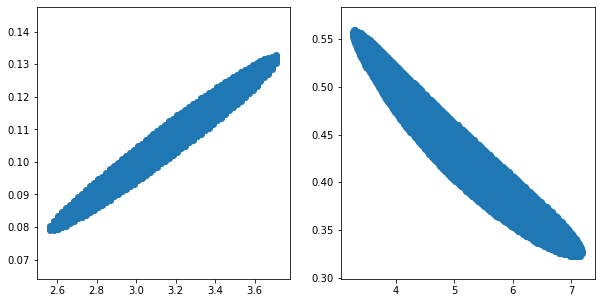

In [93]:
%%time

fig, ax = plt.subplots(1,2, figsize = (10,5))

conf = 0.95
GL = (NP, NE-NP)

Flim = scipy.stats.f.ppf(conf,*GL)

Flim1 = fopt1*(1+(GL[0]/GL[1])*Flim)
Flim2 = fopt2*(1+(GL[0]/GL[1])*Flim)

# construindo regiões de confiança por meio de testes
# na função objetivo no entorno da região ótima

good1 = []
good2 = []

for xi in np.linspace(0,8,400):
    for yi in np.linspace(0,0.15,400):
        f = F_obj1(np.array([xi,yi]))
        if f < Flim1:
            good1+=[[xi,yi,1*f]]            
            
for xi in np.linspace(1,8,400):
    for yi in np.linspace(0.1,0.8,400):
        f = F_obj2(np.array([xi,yi]))
        if f < Flim2:
            good2+=[[xi,yi,1*f]]

good1 = np.array(good1)
good2 = np.array(good2)

ax[0].scatter(good1[:,0],good1[:,1])
ax[1].scatter(good2[:,0],good2[:,1])

#### Verificação da qualidade do modelo

In [39]:
chi2_inf = scipy.stats.chi2.ppf(0.025, NE-NP)
chi2_sup = scipy.stats.chi2.ppf(0.975, NE-NP)

print('F_obj1 = ',fopt1)
print('F_obj2 = ',fopt2)

print(chi2_inf,'< Chi2 <', chi2_sup)

F_obj1 =  3.9759743840912884
F_obj2 =  26.179045085992534
2.1797307472526497 < Chi2 < 17.534546139484647


In [52]:
ym1 = y1(xe, alpha_opt1)
ym2 = y2(xe, alpha_opt2)

res1 = ye - ym1
res2 = ye - ym2

res_mean1 = np.mean(res1)
res_std1 = np.std(res1, ddof = 1)

res_mean2 = np.mean(res2)
res_std2 = np.std(res2, ddof = 1)

conf = [0.025, 0.975]

res_mean_bounds1 = [scipy.stats.norm.ppf(j, loc=res_mean1, scale=res_std1/np.sqrt(NE))
                   for j in conf]

res_mean_bounds2 = [scipy.stats.norm.ppf(j, loc=res_mean2, scale=res_std2/np.sqrt(NE))
                   for j in conf]

print('MODELO 1\n')

print('res_mean1 = ',res_mean1)
print(res_mean_bounds1[0],'< res_mean1 <', res_mean_bounds1[1])

print('\nMODELO 2\n')

print('res_mean2 = ',res_mean2)
print(res_mean_bounds2[0],'< res_mean2 <', res_mean_bounds2[1])

MODELO 1

res_mean1 =  -0.01820119746340103
-0.42998344501618924 < res_mean1 < 0.39358105008938704

MODELO 2

res_mean2 =  -0.1725532756264303
-1.2235947876512043 < res_mean2 < 0.8784882363983435


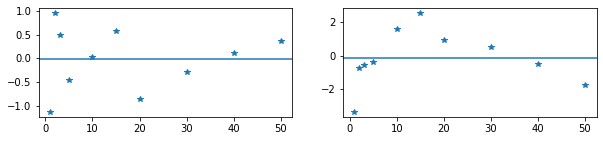

In [58]:
fig, ax = plt.subplots(1,2, figsize = (10,2))

ax[0].plot(xe, res1, '*')
ax[1].plot(xe, res2, '*')

ax[0].axhline(y=res_mean1)
ax[1].axhline(y=res_mean2);